In [2]:
#Подключаем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline as lns
import seaborn as sns

In [3]:
#Считываем датасет
path = 'retail_sales_dataset.csv'
retail_sales = pd.read_csv(path)

In [4]:
retail_sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Data Cleaning

In [5]:
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
#Изменение названия столюцов: замена пробела на подчеркивание и верхнего регистра на нижний
retail_sales.columns = [i.replace(' ','_') for i in retail_sales.columns]
retail_sales.columns = map(str.lower, retail_sales.columns)

In [7]:
#Столбец data имеет тип объекта. Изменяем на соответствующий тип
retail_sales['date'] = pd.to_datetime(retail_sales['date'])

In [8]:
#Заголовки столбцов полностью подготовлены к работе
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    1000 non-null   int64         
 1   date              1000 non-null   datetime64[ns]
 2   customer_id       1000 non-null   object        
 3   gender            1000 non-null   object        
 4   age               1000 non-null   int64         
 5   product_category  1000 non-null   object        
 6   quantity          1000 non-null   int64         
 7   price_per_unit    1000 non-null   int64         
 8   total_amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [9]:
#Проверяем датасет на пропущенные значения
retail_sales.isnull().sum()

transaction_id      0
date                0
customer_id         0
gender              0
age                 0
product_category    0
quantity            0
price_per_unit      0
total_amount        0
dtype: int64

In [10]:
#Проверяем датасет на дубликаты
retail_sales.duplicated().sum()

np.int64(0)

In [11]:
retail_sales.describe()

,transaction_id,date,age,quantity,price_per_unit,total_amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


# Что можно сказать о датасете: 
   - У нас есть 1000 уникадьных транзакций, которые совершили 1000 уникальных пользователей.
   - Всего 3 категории продукции: Beauty, Clothing и Electronics.
   - Всего имеется 345 дат, что говорит о том, что в некоторые дни было совершено несколько покупок разными пользователями.

Датасет готов для дальнейшего анализа.


# Как возраст и пол влияет на поведение покупателей

Анализ показывает, что больгинчтво покупателей являются женщинами (51%), что не значительно превосходит по количеству мужчин (49%).
Также женщины в сумме тратят больще мужчиню
Анализ покупок по категориям показал, что женщины больше тратят на одежду, а мужчины на электронику.

Возрастное распределение клиентов демонстрирует очень небольшой отрицательный перекос (-0,0488), что указывает на небольшую тенденцию к более молодому возрасту, хотя в целом оно остается относительно симметричным. Средний возраст клиентов составляет 41,39 года при стандартном отклонении 13,68. Возраст клиентов варьируется от 18 до 64 лет, при этом медианные и квартильные значения позволяют понять основную тенденцию и разброс данных

Text(0, 0.5, 'Количество покупателей')

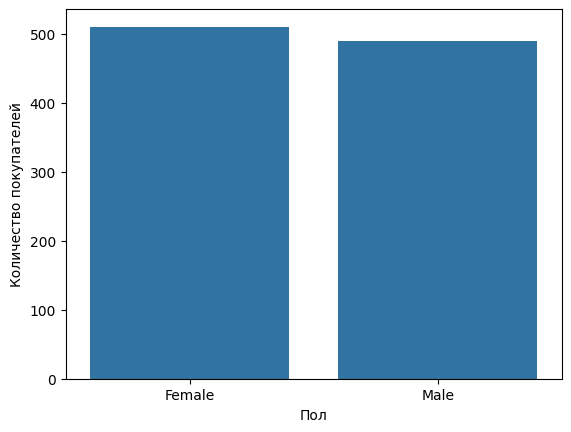

In [39]:
#Анализируем соотношение женщин и мужчин
transaction_date = retail_sales.groupby('gender', as_index=False).agg({'transaction_id': 'count'}).sort_values('gender')
sns.barplot(data=transaction_date, x='gender', y='transaction_id')
plt.xlabel('Пол')
plt.ylabel('Количество покупателей')

<Axes: ylabel='count'>

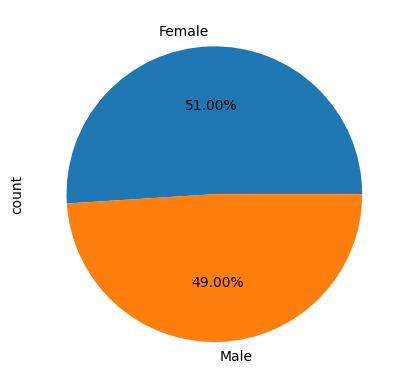

In [13]:
retail_sales['gender'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [14]:
#Находим общую сумму покупок для вычисления доли по полу
total_sum = retail_sales.total_amount.sum()

#Находим долю от объема покупок
transaction_date['transaction_id'] = (transaction_date['transaction_id'] / total_sum) * 100


Text(0.5, 0, 'Пол')

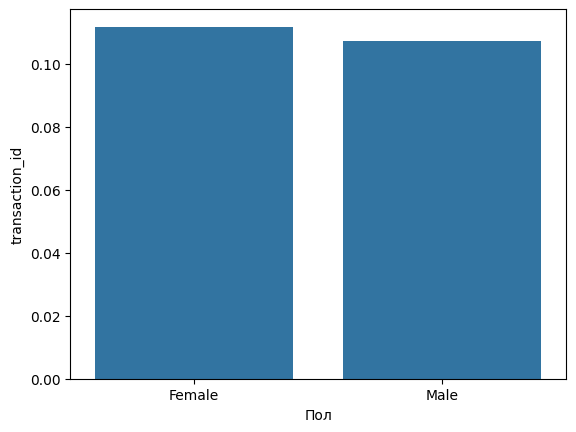

In [38]:
#На диаграмме видно, что независимо от того, что соотношение женщин больше, они имеют больщий объем трат
sns.barplot(data=transaction_date, x='gender', y='transaction_id')
plt.xlabel('Пол')

([<matplotlib.patches.Wedge at 0x1d54d30a990>,
 [Text(0.6047166363201147, 0.9188676671630612, 'Beauty'),
  Text(-1.0953228059881415, 0.10133089697749875, 'Clothing'),
  Text(0.5174998962325216, -0.9706667076805146, 'Electronics')],
 [Text(0.3298454379927898, 0.501200545725306, '31%'),
  Text(-0.5974488032662589, 0.05527139835136295, '34%'),
  Text(0.28227267067228445, -0.5294545678257352, '34%')])

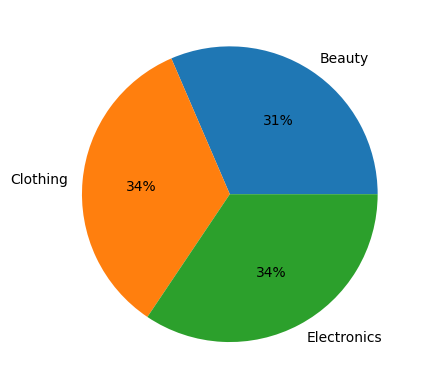

In [16]:
#Категории по тратам мужчин и женщин
category_total = retail_sales.groupby('product_category', as_index=False).agg({'total_amount': 'sum'})
plt.pie(x=category_total.total_amount, labels=category_total.product_category, autopct="%0.0f%%")

([<matplotlib.patches.Wedge at 0x1d54d431f10>,
 [Text(0.5853789015247219, 0.9313063629384856, 'Beauty'),
  Text(-1.099636655998847, 0.028270563907944312, 'Clothing'),
  Text(0.5612504623954915, -0.9460432962929589, 'Electronics')],
 [Text(0.31929758264984825, 0.5079852888755375, '32%'),
  Text(-0.5998018123630074, 0.015420307586151441, '35%'),
  Text(0.30613661585208624, -0.5160236161597958, '33%')])

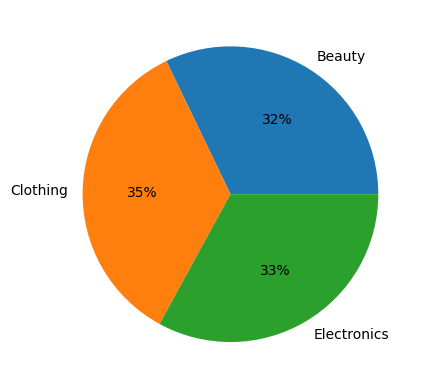

In [17]:
#Категории по тратам женщин
category_total = retail_sales.query('gender == "Female"').groupby('product_category', as_index=False).agg({'total_amount': 'sum'})
plt.pie(x=category_total.total_amount, labels=category_total.product_category, autopct="%0.0f%%")

([<matplotlib.patches.Wedge at 0x1d54d47f7d0>,
 [Text(0.6246113502987571, 0.9054615734960614, 'Beauty'),
  Text(-1.0856535289436016, 0.17707742682878747, 'Clothing'),
  Text(0.4707044290322592, -0.9942018610369904, 'Electronics')],
 [Text(0.3406971001629584, 0.4938881309978516, '31%'),
  Text(-0.5921746521510554, 0.09658768736115679, '33%'),
  Text(0.25674787038123226, -0.5422919242019947, '36%')])

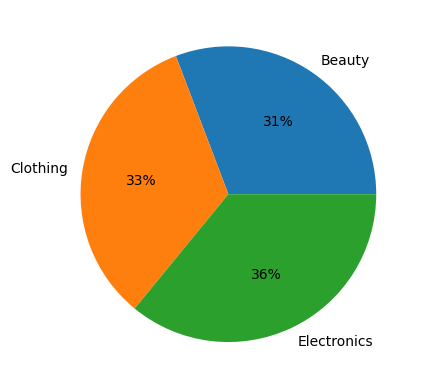

In [18]:
#Категории по тратам у мужчин
category_total = retail_sales.query('gender == "Male"').groupby('product_category', as_index=False).agg({'total_amount': 'sum'})
plt.pie(x=category_total.total_amount, labels=category_total.product_category, autopct="%0.0f%%")

In [19]:
#Описательная статистика по возрасту
retail_sales.age.describe()

count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: age, dtype: float64

# Quantity

Распределение количества указывает на среднее количество покупок, равное 2,514, со стандартным отклонением 1,133. Большинство покупок приходится на диапазон от 1 до 4 наименований, при этом 50% покупок составляют 3 или менее наименований.

In [20]:
# Описательная статистика по количеству продуктов в заказе
retail_sales['quantity'].describe()

count    1000.000000
mean        2.514000
std         1.132734
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: quantity, dtype: float64

Text(0, 0.5, 'Количество заказов')

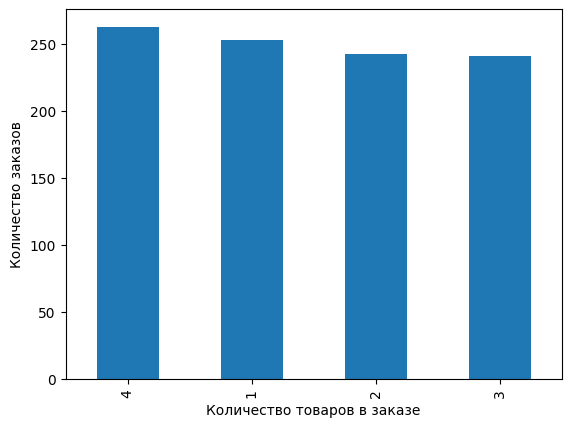

In [37]:
#Составляем диаграмму, отображающую количество товаров заказах
retail_sales['quantity'].value_counts().plot(kind='bar')
plt.xlabel('Количество товаров в заказе')
plt.ylabel('Количество заказов')

# Стоимость товаров

Столбец "price_per_unit" имеет разные значения в 25, 30, 50, 300 и 500 с соответствующими значениями 210, 183, 211, 197 и 199 соответственно. Сводная статистика показывает среднее значение 179,89, при этом цены варьируются от 25 до 500, а 50% цен падают от 30 до 300.

In [22]:
# descriptive stats
retail_sales['price_per_unit'].describe()

count    1000.000000
mean      179.890000
std       189.681356
min        25.000000
25%        30.000000
50%        50.000000
75%       300.000000
max       500.000000
Name: price_per_unit, dtype: float64

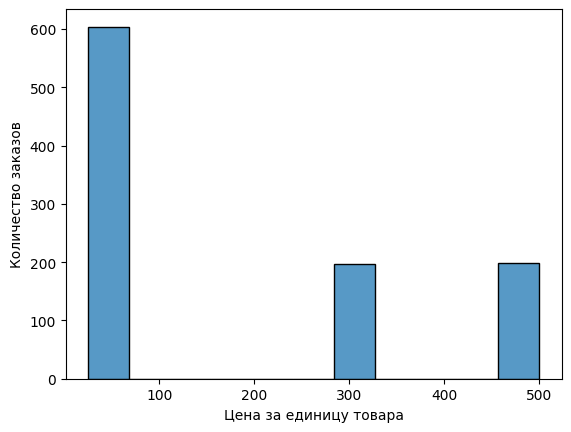

In [33]:
#Составляем диаграмму, отражающую количество заказов по сумме за единицу товара
sns.histplot(retail_sales, x='price_per_unit')
plt.xlabel('Цена за единицу товара')
plt.ylabel('Количество заказов')
plt.show()

# Общая сумма заказов

Данные для столбца "total_spent" указывают на средний расход 456 при стандартном отклонении 560. Расходы варьируются от 25 до 2000, при этом 50% значений приходится на диапазон от 60 до 900, что отражает различные структуры расходов клиентов.

In [24]:
#Описательная статистика по стоимости заказов
retail_sales['total_amount'].describe()

count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: total_amount, dtype: float64

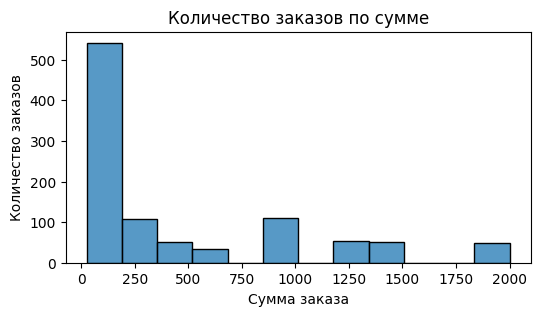

In [34]:
#Составляем диаграмму по количеству заказов по сумме
plt.figure(figsize=(6,3))
sns.histplot(retail_sales['total_amount'])
plt.title('Количество заказов по сумме')
plt.ylabel('Количество заказов')
plt.xlabel('Сумма заказа')
plt.show()